## Yelp Review Analysis
Nayan Chandra Nath

## Project Objectives

Yelp is an application to give the stage to clients to compose surveys and give a star-rating. In this way, it can be seen an extraordinary capability of Yelp dataset as a profitable experiences store. 

The principle motivation behind our undertaking is to lead an exhaustive investigation on 7 distinctive food sorts of eateries which are Korean, Japanese, Chinese, Vietnamese, Thai, French and Italian, make sense of what makes a decent restaurant and what concerns clients, and afterward make suggestions of things to come improvement and benefit development. In particular, I will chiefly break down clients' audits and make sense of the reasons why clients love or abhorrence the restaurant. For instance, there might be incredible audits principally because of the well disposed administration, or negative surveys about the high cost. In the interim, I will likewise look at among those 7 diverse cooking types and make sense of contrasts from audits and increase profitable bits of knowledge to make altered suggestions to various kinds of restaurants.

# 2. Description of Data

The Yelp dataset is available on https://www.yelp.com/dataset_challenge/dataset. In total, dataset consists of 5,200,000 user reviews, information on 174,000 business. I will be focused on two tables which are the business and review table. Attribues of the business table are as following:

* business_id: ID of the business 
* name: name of the business
* neighborhood 
* address: address of the business
* city: city of the business
* state: state of the business
* postal_code: postal code of the business
* latitude: latitude of the business
* longitude: longitude of the business
* stars: average rating of the business
* review_count: number of reviews received
* is_open: 1 if the business is open, 0 therwise
* categories: multiple categories of the business

Attribues of review table are as following:
* review_id: ID of the review
* user_id: ID of the user
* business_id: ID of the business
* stars: ratings of the business
* date: review date
* text: review from the user
* useful: number of users who vote a review as usefull
* funny: number of users who vote a review as funny
* cool: number of users who vote a review as cool

# 3. Direction of Analysis 


**Exploratory data  analysis**
* Count the number of each cuisine type of restaurants
* Count the number of reviews in each cuisine type of restaurants
* Visualize the distribution of restaurants according to the ratings and cuisine types of restaurants.

**Review Analysis**
* Clean the category column in business table into different cuisine types of restaurants and find out how the reviews can help this type of restaurants improve in the future.
* Refer the business id in business table to review table, collect all the reviews of this type of restaurants and perform sentiment analysis to analyze frequent words in positive and negative reviews.
* Implement SVM model to get relatively positive and negative words and get score of each word.
* Get top 10 positive words and negative words in each cuisine type of restaurants in order to figure out the reason of high score and low score.
* Compare among different types of restaurants to figure out the advantages and disadvantages, then I can generate a series of recommendations to this type of restaurants for the future development.
* Overall, recommendations may have different topics which is but not limited to service, food, or decoration, etc. My analysis is generally based on review words which can tell from such as rude, overpriced, and slow to find out which aspect in this type of restaurants that they could improve.

# 4.  Summary of Progress 

**Selection and Filtering**
* Filter out 50 states of US.  
* Filter out all restaurants of US. 

**Cleaning**
* Categorize all restaurants by cuisine type using the matching keywords.  
* Delete all records with null category. 
* Remove quotation marks of name and address columns.  
* Label restaurants above rating of 4 as positive, below rating 3 label as negative, label rating 3 as neural.  
* Drop rows with neural label.
* Apply 'bag of words': the frequencies of various words appeared in each review as features and conduct SVM model to get score of each word.  
		
**Reshaping and Reindexing**
* Reindex the data frame.  
* Build a new column to input the new category name and delete the previous column.  
* Convert array to dataframe. 
		
**Visualization**
* Visualize the distribution of restaurants and reviews by category using seaborn.  
* Visualize the distribution of restaurants and reviews by rating. 
* Visualize top 10 negative words and positive words in each cuisine type.

**Manipulation**
* Get a 'polarity score' (a value that reflects the polarity of sentiment) towards each restaurant category, the sentiment score of each word was first multiplied by its frequency, and then normalized by the total number of reviews for the specific category of restaurants.   

**Merging multiple data sets**
* Merge business table and review.  

# 5. Progress in Coding 

## Data Preparation

In [1]:
import pandas as pd
import seaborn as sns
%pylab inline
import requests, re
import pandas as pd
import seaborn as sns
import nltk
from nltk.text import Text

Populating the interactive namespace from numpy and matplotlib


### Clean Yelp_business dataset

In [2]:
# get yelp raw data
business = pd.read_csv('yelp_dataset/yelp_business.csv')
# look at the little chunk of yelp business data
business.head()

business_id                        name neighborhood  \
0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"          NaN   
1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"          NaN   
2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"          NaN   
3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"          NaN   
4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"          NaN   

                            address            city state postal_code  \
0        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1              "3101 Washington Rd"        McMurray    PA       15317   
2          "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
3  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ       85282   
4                    "581 Howe Ave"  Cuyahoga Falls    OH       44221   

    latitude   longitude  stars  review_count  is_open  \
0  33.330690 -111.978599    4.0            22        1   
1  40.291685  -80.104900    3.0            11        1   
2  33.524903 -112.115310    1.5            18        1   
3  33.383147 -111.964725    3.0             9        0   
4  41.119535  -81.475690    3.5           116        1   

                                          categories  
0  Dentists;General Dentistry;Health & Medical;Or...  
1  Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2  Departments of Motor Vehicles;Public Services ...  
3                            Sporting Goods;Shopping  
4  American (New);Nightlife;Bars;Sandwiches;Ameri...

In [3]:
## drop unuseful column 'neighborhood' all because all it contains NaN values which states redundant information
business.drop(['neighborhood'], axis=1, inplace=True)

## remove quotation marks in name and address column
business.name=business.name.str.replace('"','')
business.address=business.address.str.replace('"','')

## filter restaurants of US
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
usa=business.loc[business['state'].isin(states)]
business.head()

business_id                      name  \
0  FYWN1wneV18bWNgQjJ2GNg          Dental by Design   
1  He-G7vWjzVUysIKrfNbPUQ       Stephen Szabo Salon   
2  KQPW8lFf1y5BT2MxiSZ3QA     Western Motor Vehicle   
3  8DShNS-LuFqpEWIp0HxijA          Sports Authority   
4  PfOCPjBrlQAnz__NXj9h_w  Brick House Tavern + Tap   

                          address            city state postal_code  \
0        4855 E Warner Rd, Ste B9       Ahwatukee    AZ       85044   
1              3101 Washington Rd        McMurray    PA       15317   
2          6025 N 27th Ave, Ste 1         Phoenix    AZ       85017   
3  5000 Arizona Mills Cr, Ste 435           Tempe    AZ       85282   
4                    581 Howe Ave  Cuyahoga Falls    OH       44221   

    latitude   longitude  stars  review_count  is_open  \
0  33.330690 -111.978599    4.0            22        1   
1  40.291685  -80.104900    3.0            11        1   
2  33.524903 -112.115310    1.5            18        1   
3  33.383147 -111.964725    3.0             9        0   
4  41.119535  -81.475690    3.5           116        1   

                                          categories  
0  Dentists;General Dentistry;Health & Medical;Or...  
1  Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2  Departments of Motor Vehicles;Public Services ...  
3                            Sporting Goods;Shopping  
4  American (New);Nightlife;Bars;Sandwiches;Ameri...

In [4]:
## select all restaurants in USA
us_restaurants=usa[usa['categories'].str.contains('Restaurants')]

## select out 16 cuisine types of restaurants and rename the category
us_restaurants.is_copy=False
us_restaurants['category']=pd.Series()
us_restaurants.loc[us_restaurants.categories.str.contains('American'),'category'] = 'American'
us_restaurants.loc[us_restaurants.categories.str.contains('Mexican'), 'category'] = 'Mexican'
us_restaurants.loc[us_restaurants.categories.str.contains('Italian'), 'category'] = 'Italian'
us_restaurants.loc[us_restaurants.categories.str.contains('Japanese'), 'category'] = 'Japanese'
us_restaurants.loc[us_restaurants.categories.str.contains('Chinese'), 'category'] = 'Chinese'
us_restaurants.loc[us_restaurants.categories.str.contains('Thai'), 'category'] = 'Thai'
us_restaurants.loc[us_restaurants.categories.str.contains('Mediterranean'), 'category'] = 'Mediterranean'
us_restaurants.loc[us_restaurants.categories.str.contains('French'), 'category'] = 'French'
us_restaurants.loc[us_restaurants.categories.str.contains('Vietnamese'), 'category'] = 'Vietnamese'
us_restaurants.loc[us_restaurants.categories.str.contains('Greek'),'category'] = 'Greek'
us_restaurants.loc[us_restaurants.categories.str.contains('Indian'),'category'] = 'Indian'
us_restaurants.loc[us_restaurants.categories.str.contains('Korean'),'category'] = 'Korean'
us_restaurants.loc[us_restaurants.categories.str.contains('Hawaiian'),'category'] = 'Hawaiian'
us_restaurants.loc[us_restaurants.categories.str.contains('African'),'category'] = 'African'
us_restaurants.loc[us_restaurants.categories.str.contains('Spanish'),'category'] = 'Spanish'
us_restaurants.loc[us_restaurants.categories.str.contains('Middle_eastern'),'category'] = 'Middle_eastern'
us_restaurants.category[:20]

/home/nayan/.local/lib/python3.6/site-packages/pandas/core/generic.py:5192: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/home/nayan/.local/lib/python3.6/site-packages/pandas/core/generic.py:5193: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


4     American
10         NaN
14    American
28         NaN
29    American
40    Japanese
44     Italian
45         NaN
46         NaN
52    American
53         NaN
54    American
64         NaN
72         NaN
75         NaN
76         NaN
80         NaN
81    American
88         NaN
91     Italian
Name: category, dtype: object

In [5]:
## drop null values in category, delete original column categories and reset the index
us_restaurants=us_restaurants.dropna(axis=0, subset=['category'])
del us_restaurants['categories']
us_restaurants=us_restaurants.reset_index(drop=True)
us_restaurants.head(10)

business_id                          name  \
0  PfOCPjBrlQAnz__NXj9h_w      Brick House Tavern + Tap   
1  fNMVV_ZX7CJSDWQGdOM8Nw    Showmars Government Center   
2  gAy4LYpsScrj8POnCW6btQ                    Toast Cafe   
3  tRVx2c89coruPRwYhGTcTw                          Yuzu   
4  BnuzcebyB1AfxH0kjNWqSg      Carrabba's Italian Grill   
5  Pd52CjgyEU3Rb8co6QfTPw       Flight Deck Bar & Grill   
6  n7V4cD-KqqE3OXk0irJTyA                     GameWorks   
7  B5EZlEDH6AVDk8tQGHAGqg                     Villa Tap   
8  F0fEKpTk7gAmuSFI0KW1eQ                Cafe Mastrioni   
9  VdlPZg2NAu8t8GkdbPLecg  Tandoori Times Indian Bistro   

                          address            city state postal_code  \
0                    581 Howe Ave  Cuyahoga Falls    OH       44221   
1                    600 E 4th St       Charlotte    NC       28202   
2                  2429 Hwy 160 W       Fort Mill    SC       29708   
3               13603 Madison Ave        Lakewood    OH       44107   
4               245 Lancaster Ave          Frazer    PA       19355   
5           6730 S Las Vegas Blvd       Las Vegas    NV       89119   
6  6587 Las Vegas Blvd S, Ste 171       Las Vegas    NV       89119   
7                2302 Packers Ave         Madison    WI       53704   
8   4250 S Rainbow Blvd, Ste 1007       Las Vegas    NV       89103   
9      8140 N Hayden Rd, Ste H115      Scottsdale    AZ       85258   

    latitude   longitude  stars  review_count  is_open  category  
0  41.119535  -81.475690    3.5           116        1  American  
1  35.221647  -80.839345    3.5             7        1  American  
2  35.047287  -80.990559    3.5             6        0  American  
3  41.476846  -81.786971    3.5            78        1  Japanese  
4  40.041003  -75.542497    3.5            25        0   Italian  
5  36.066914 -115.170848    4.0            13        1  American  
6  36.068259 -115.178877    3.0           349        1  American  
7  43.123389  -89.355390    4.0            34        1  American  
8  36.111057 -115.241688    1.5             3        0   Italian  
9  33.555212 -111.900456    3.5           263        1    Indian

In [6]:
## check total number of us restaurants
us_restaurants.shape

(19156, 12)

In [7]:
## check whether has duplicated business id
us_restaurants.business_id.duplicated().sum()

0

In [8]:
## check the datatype
us_restaurants.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
category         object
dtype: object

In [9]:
## check missing values
us_restaurants.isnull().sum()

business_id      0
name             0
address          0
city             0
state            0
postal_code     22
latitude         0
longitude        0
stars            0
review_count     0
is_open          0
category         0
dtype: int64

### Clean yelp_review dataset

In [10]:
## load review table (Here I am taking 800000 rows from the actual review table)
review = pd.read_csv('yelp_dataset/yelp_review.csv', nrows=800000)
review.head()

review_id                 user_id             business_id  \
0  vkVSCC7xljjrAI4UGfnKEQ  bv2nCi5Qv5vroFiqKGopiw  AEx2SYEUJmTxVVB18LlCwA   
1  n6QzIUObkYshz4dz2QRJTw  bv2nCi5Qv5vroFiqKGopiw  VR6GpWIda3SfvPC-lg9H3w   
2  MV3CcKScW05u5LVfF6ok0g  bv2nCi5Qv5vroFiqKGopiw  CKC0-MOWMqoeWf6s-szl8g   
3  IXvOzsEMYtiJI0CARmj77Q  bv2nCi5Qv5vroFiqKGopiw  ACFtxLv8pGrrxMm6EgjreA   
4  L_9BTb55X0GDtThi6GlZ6w  bv2nCi5Qv5vroFiqKGopiw  s2I_Ni76bjJNK9yG60iD-Q   

   stars        date                                               text  \
0      5  2016-05-28  Super simple place but amazing nonetheless. It...   
1      5  2016-05-28  Small unassuming place that changes their menu...   
2      5  2016-05-28  Lester's is located in a beautiful neighborhoo...   
3      4  2016-05-28  Love coming here. Yes the place always needs t...   
4      4  2016-05-28  Had their chocolate almond croissant and it wa...   

   useful  funny  cool  
0       0      0     0  
1       0      0     0  
2       0      0     0  
3       0      0     0  
4       0      0     0

In [11]:
## check missing values
review.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
date           0
text           0
useful         0
funny          0
cool           0
dtype: int64

In [12]:
## check duplicates of review_id
review.review_id.duplicated().sum()

0

### Merge two datasets and get new dataframe restaurants_reviews

In [15]:
## merge business table and review table
restaurants_reviews = pd.merge(us_restaurants, review, on = 'business_id')

## update column names
restaurants_reviews.rename(columns={'stars_x':'avg_star','stars_y':'review_star'}, inplace=True)

## add column of number of words in review and label of negative and postive reviews
restaurants_reviews['num_words_review'] = restaurants_reviews.text.str.replace('\n',''). \
                                          str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','').map(lambda x: len(x.split()))

In [16]:
## add column of number of words in review and label of negative and postive reviews
restaurants_reviews['num_words_review'] = restaurants_reviews.text.str.replace('\n',''). \
                                          str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','').map(lambda x: len(x.split()))

In [17]:
# label reviews as positive or negative
restaurants_reviews['labels'] = ''
restaurants_reviews.loc[restaurants_reviews.review_star >=4, 'labels'] = 'positive'
restaurants_reviews.loc[restaurants_reviews.review_star ==3, 'labels'] = 'neural'
restaurants_reviews.loc[restaurants_reviews.review_star <3, 'labels'] = 'negative'

# drop neutral reviews for easy analysis
restaurants_reviews.drop(restaurants_reviews[restaurants_reviews['labels'] =='neural'].index, axis=0, inplace=True)
restaurants_reviews.reset_index(drop=True, inplace=True)

restaurants_reviews.head()

business_id                      name       address  \
0  PfOCPjBrlQAnz__NXj9h_w  Brick House Tavern + Tap  581 Howe Ave   
1  PfOCPjBrlQAnz__NXj9h_w  Brick House Tavern + Tap  581 Howe Ave   
2  PfOCPjBrlQAnz__NXj9h_w  Brick House Tavern + Tap  581 Howe Ave   
3  PfOCPjBrlQAnz__NXj9h_w  Brick House Tavern + Tap  581 Howe Ave   
4  PfOCPjBrlQAnz__NXj9h_w  Brick House Tavern + Tap  581 Howe Ave   

             city state postal_code   latitude  longitude  avg_star  \
0  Cuyahoga Falls    OH       44221  41.119535  -81.47569       3.5   
1  Cuyahoga Falls    OH       44221  41.119535  -81.47569       3.5   
2  Cuyahoga Falls    OH       44221  41.119535  -81.47569       3.5   
3  Cuyahoga Falls    OH       44221  41.119535  -81.47569       3.5   
4  Cuyahoga Falls    OH       44221  41.119535  -81.47569       3.5   

   review_count  ...               review_id                 user_id  \
0           116  ...  rnvu74aNIPn93Z9Ue11Epw  bgtr7jOlALe8ay4g7pnf4A   
1           116  ...  OE5dH664oSSK_-TvIl263w  ndZOHkG_FWdL4TRd9xRfNQ   
2           116  ...  SWeHmo8uHHWbbv94VdAMeQ  UqtE83J-6NMQNNJzpnWwEQ   
3           116  ...  fCCL0pAgYGccUs8shHHIUA  PixAmdRa58XZ3hr8YLS36g   
4           116  ...  -VOh0NNnIo1r24hjwSZL4Q  Hly0NEWXMxbuXa2zm_NJOQ   

  review_star        date                                               text  \
0           4  2016-05-05  I've always enjoyed my time at brick house foo...   
1           2  2017-03-19  1st time here. Came w my Unc bc Louies was clo...   
2           1  2015-08-31  Worse service ever andI use to be a server so ...   
3           5  2015-10-09  I am updating my review to 5-stars because I t...   
4           4  2015-01-15  I enjoyed this place.  I went the night the Bu...   

  useful funny  cool  num_words_review    labels  
0      0     0     0                37  positive  
1      0     0     0                60  negative  
2      0     0     0               106  negative  
3      2     0     2               498  positive  
4      0     0     0                56  positive  

[5 rows x 22 columns]

## Exploratory Data Analysis

### Restaurants Distribution

#### Distribution of restaurants in each category

In [18]:
plt.style.use('ggplot')

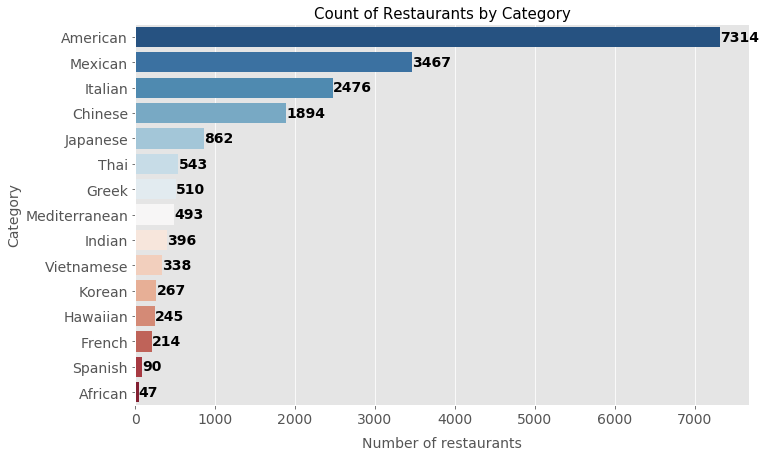

In [19]:
plt.figure(figsize=(11,7))
grouped = us_restaurants.category.value_counts()
sns.countplot(y='category',data=us_restaurants, 
              order = grouped.index, palette= sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Number of restaurants', fontsize=14, labelpad=10)
plt.ylabel('Category', fontsize=14)
plt.title('Count of Restaurants by Category', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(us_restaurants.category.value_counts()):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)

Categories in dark blue color have the largest number of restaurants. On the contrary, categories in dark red color have the least number of restaurants. The top 5 type of restaurants are American, Mexican, Italian, Chinese and Japanese. 

#### Top 10 cities with most restaurants

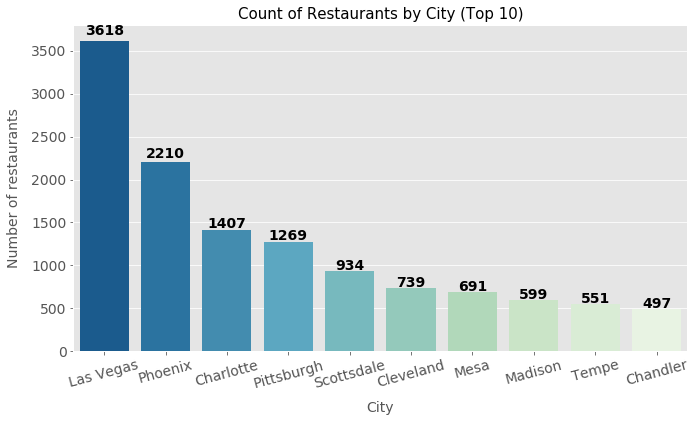

In [20]:
plt.figure(figsize=(11,6))
grouped = us_restaurants.city.value_counts()[:10]
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("GnBu_r", len(grouped)))
plt.ylabel('Number of restaurants', fontsize=14, labelpad=10)
plt.xlabel('City', fontsize=14, labelpad=10)
plt.title('Count of Restaurants by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

#### Distribution of restaurants in each state

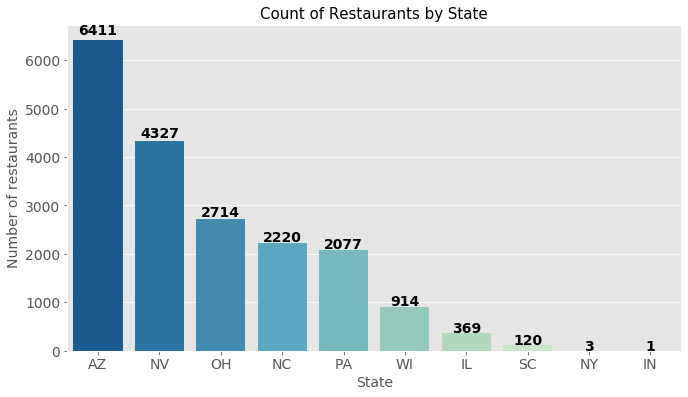

In [21]:
plt.figure(figsize=(11,6))
grouped = us_restaurants.state.value_counts()
sns.barplot(grouped.index, grouped.values,palette=sns.color_palette("GnBu_r", len(grouped)) )
plt.ylabel('Number of restaurants', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.title('Count of Restaurants by State', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center', fontweight='bold', fontsize=14)

### Reviews Distribution

#### Distribution of reviews by cuisine type

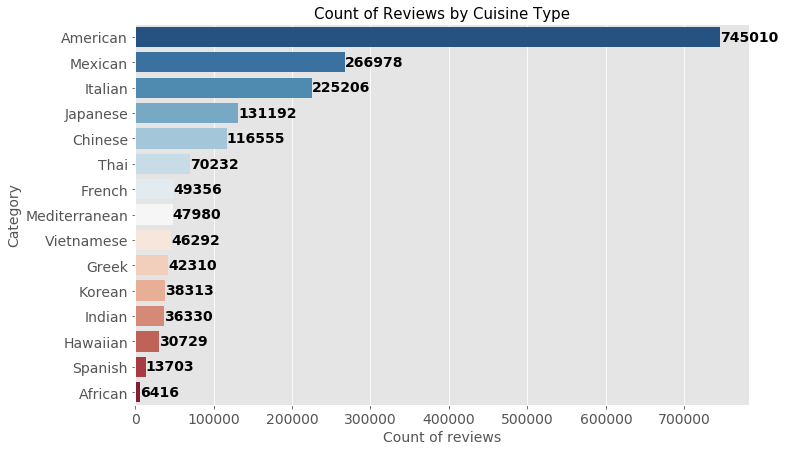

In [23]:
plt.figure(figsize=(11,7))
grouped = us_restaurants.groupby('category')['review_count'].sum().sort_values(ascending = False)
sns.barplot(y=grouped.index, x= grouped.values, palette= sns.color_palette("RdBu_r", len(grouped)) )
plt.ylabel('Category', fontsize=14)
plt.xlabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews by Cuisine Type', fontsize=15)
for i,v in enumerate(grouped):
    plt.text(v, i+0.15, str(v),fontweight='bold', fontsize=14)
plt.tick_params(labelsize=14)

#### Top 10 cities with most reviews

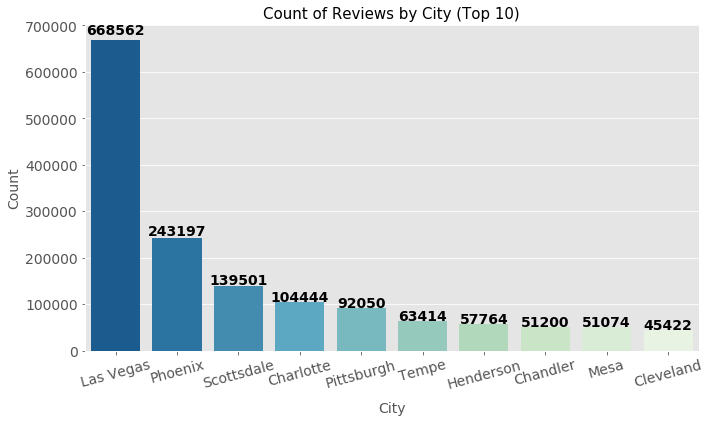

In [24]:
plt.figure(figsize=(11,6))
grouped = us_restaurants.groupby('city')['review_count'].sum().sort_values(ascending=False)[:10]
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("GnBu_r", len(grouped)) )
plt.xlabel('City', labelpad=10, fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Reviews by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

#### Top 9 restaurants with most reviews

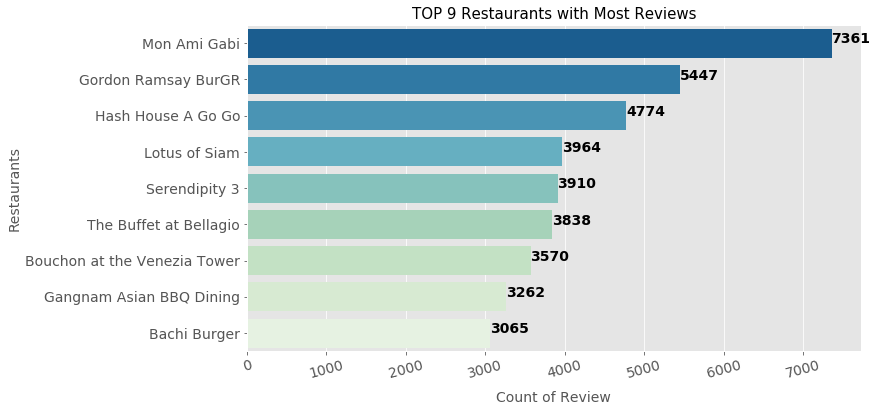

In [25]:
plt.figure(figsize=(11,6))
grouped = us_restaurants[['name','review_count']].sort_values(by='review_count', ascending=False)[:9]
sns.barplot(x=grouped.review_count, y = grouped.name, palette=sns.color_palette("GnBu_r", len(grouped)), ci=None)
plt.xlabel('Count of Review', labelpad=10, fontsize=14)
plt.ylabel('Restaurants', fontsize=14)
plt.title('TOP 9 Restaurants with Most Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped.review_count):
    plt.text(v, i, str(v), fontweight='bold', fontsize=14)

#### Distribution of positive and negative reviews in each category

In [26]:
table = pd.pivot_table(restaurants_reviews, values=["review_id"], index=["category"],columns=["labels"], 
                       aggfunc=len, margins=True, dropna=True,fill_value=0)
table_percentage = table.div( table.iloc[:,-1], axis=0).iloc[:-1,-2].sort_values(ascending=False)

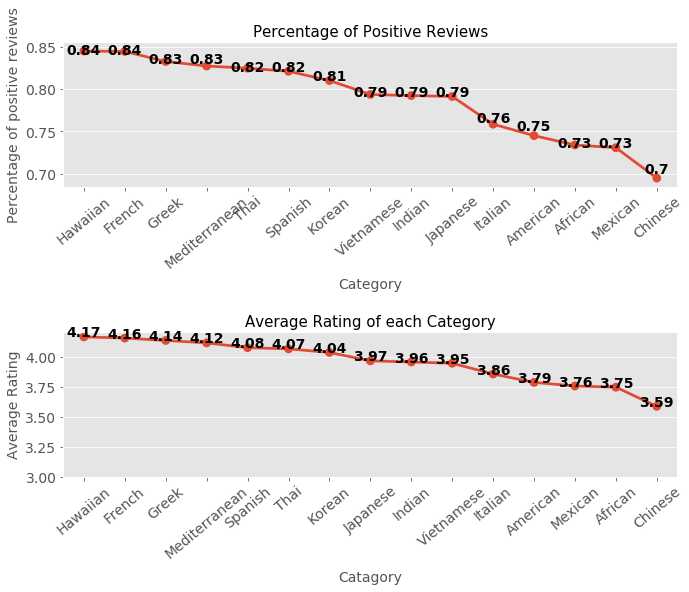

In [27]:
table = pd.pivot_table(restaurants_reviews, values=["review_id"], index=["category"],columns=["labels"], 
                       aggfunc=len, margins=True, dropna=True,fill_value=0)
table_percentage = table.div( table.iloc[:,-1], axis=0).iloc[:-1,-2].sort_values(ascending=False)
plt.figure(figsize=(11,8))
plt.subplot(211)
sns.pointplot(x=table_percentage.index, y= table_percentage.values)
plt.xlabel('Category', labelpad=7, fontsize=14)
plt.ylabel('Percentage of positive reviews', fontsize=14)
plt.title('Percentage of Positive Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=40)
for  i, v in enumerate(table_percentage.round(2)):
    plt.text(i, v*1.001, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)
    
plt.subplot(212)
grouped = restaurants_reviews.groupby('category')['review_star'].mean().round(2).sort_values(ascending=False)
sns.pointplot(grouped.index, grouped.values)
plt.ylim(3)
plt.xlabel('Catagory', labelpad=10, fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.title('Average Rating of each Category', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=40)
for  i, v in enumerate(grouped):
    plt.text(i, v, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)
    
plt.subplots_adjust(hspace=1)

#### Average length of reviews

#### Average length of words in each category

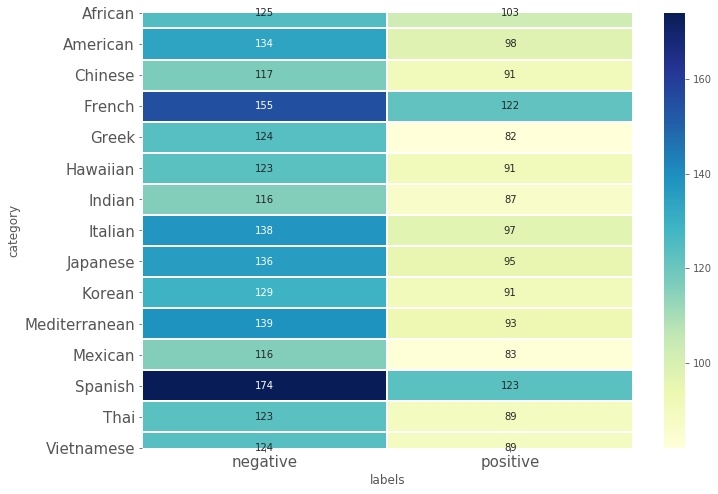

In [28]:
table = restaurants_reviews.groupby(['category','labels'])['num_words_review'].mean().round().unstack()
plt.figure(figsize=(11,8))
sns.heatmap(table, cmap='YlGnBu', fmt='g',annot=True, linewidths=1)
plt.tick_params(labelsize=15)

### Ratings Distribution

#### Distribution of ratings by restaurants

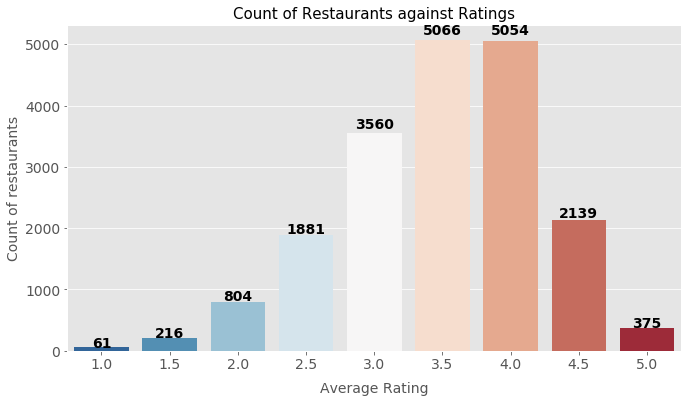

In [29]:
plt.figure(figsize=(11,6))
grouped = us_restaurants.stars.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Average Rating', labelpad=10, fontsize=14)
plt.ylabel('Count of restaurants', fontsize=14)
plt.title('Count of Restaurants against Ratings', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

#### Distribution of ratings by reviews

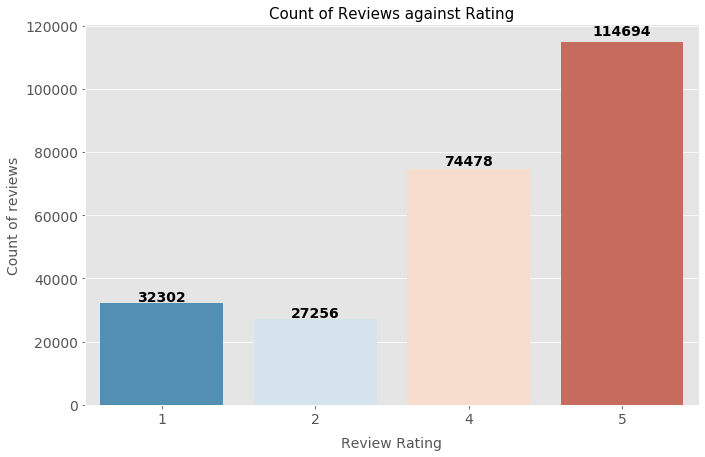

In [30]:
plt.figure(figsize=(11,7))
grouped = restaurants_reviews.review_star.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Review Rating', labelpad=10, fontsize=14)
plt.ylabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews against Rating', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

## Review Analysis

### Positive words and negative words

In [31]:
import csv
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [32]:
## convert text to lower case
restaurants_reviews.text = restaurants_reviews.text.str.lower()

## remove unnecessary punctuation
restaurants_reviews['removed_punct_text']= restaurants_reviews.text.str.replace('\n',''). \
                                          str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','')


In [33]:
## import positive file which contains common meaningless positive words such as good
file_positive = open('positive.txt', encoding="ISO-8859-1")
reader =csv.reader(file_positive)
positive_words = [word[0] for word in reader]

## import negative file which contains common meaningless positive words such as bad
file_negative = open('negative.txt', encoding="ISO-8859-1")
reader =csv.reader(file_negative)
negative_words = [word[0] for word in reader]

In [34]:
## get dataset by category
def get_dataset(category):
    df = restaurants_reviews[['removed_punct_text','labels']][restaurants_reviews.category==category]
    df.reset_index(drop=True, inplace =True)
    df.rename(columns={'removed_punct_text':'text'}, inplace=True)
    return df



## only keep positive and negative words
def filter_words(review):
    words = [word for word in review.split() if word in positive_words + negative_words]
    words = ' '.join(words)
    return words

## Use Korean as an example 

In [35]:
Korean_reviews = get_dataset('Korean')

In [36]:
Korean_train, Korean_test = train_test_split(Korean_reviews[['text','labels']],test_size=0.5)

In [37]:
print('Total %d number of reviews' % Korean_train.shape[0])

Total 2599 number of reviews


In [38]:
def split_data(dataset, test_size):
    df_train, df_test = train_test_split(dataset[['text','labels']],test_size=test_size)
    return df_train

In [39]:
## filter words
Korean_train.text = Korean_train.text.apply(filter_words)

In [40]:
## construct features and labels
terms_train=list(Korean_train['text'])
class_train=list(Korean_train['labels'])

terms_test=list(Korean_test['text'])
class_test=list(Korean_test['labels'])

In [41]:
## get bag of words : the frequencies of various words appeared in each review
vectorizer = CountVectorizer()
feature_train_counts=vectorizer.fit_transform(terms_train)
feature_train_counts.shape

(2599, 1314)

### Run model

In [43]:
svm = LinearSVC()
svm.fit(feature_train_counts, class_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Support Vector Machine (SVM) model was applied to differentiate positive and negative words in reviews, and further to get a word score to understand how positive or how negative the words are.

### Now we can calculate polarity score of each word in the specific category

#### Korean

In [44]:
## create dataframe for score of each word in a review calculated by svm model
coeff = svm.coef_[0]
Korean_words_score = pd.DataFrame({'score': coeff, 'word': vectorizer.get_feature_names()})

In [45]:
## get frequency of each word in all reviews in specific category
Korean_reviews = pd.DataFrame(feature_train_counts.toarray(), columns=vectorizer.get_feature_names())
Korean_reviews['labels'] = class_train
Korean_frequency = Korean_reviews[Korean_reviews['labels'] =='positive'].sum()[:-1]

In [46]:
Korean_words_score.set_index('word', inplace=True)

In [47]:
Korean_polarity_score = Korean_words_score
Korean_polarity_score['frequency'] = Korean_frequency

‘polarity score’ (a value that reflects the polarity of sentiment) towards each restaurant category, the sentiment
score of each word was first multiplied by its frequency, and then normalized by the total number of reviews for the specific category of restaurants.

𝑝𝑜𝑙𝑎𝑟𝑖𝑡𝑦_𝑠𝑐𝑜𝑟𝑒 𝑡, 𝑐 = 𝑠𝑐𝑜𝑟𝑒(𝑡)× 𝑡𝑜𝑡𝑎𝑙_𝑓𝑟𝑒𝑞𝑢𝑒𝑛𝑐𝑦(𝑡, 𝑐) 𝑛𝑢𝑚𝑏𝑒𝑟_𝑜𝑓_ 𝑟𝑒𝑣𝑖𝑒𝑤𝑠(𝑐)

𝑝𝑜𝑙𝑎𝑟𝑖𝑡𝑦_𝑠𝑐𝑜𝑟𝑒 𝑡, 𝑐 is the index for measuring how essential word 𝑡 is among restaurants of type 𝑐 𝑡𝑜𝑡𝑎𝑙_𝑓𝑟𝑒𝑞𝑢𝑒𝑛𝑐𝑦(𝑡, 𝑐) is the total frequency of word 𝑡 in all reviews of type 𝑐 restaurants 𝑛𝑢𝑚𝑏𝑒𝑟_𝑜𝑓_ 𝑟𝑒𝑣𝑖𝑒𝑤𝑠(𝑐) is the total number of reviews of type 𝑐 restaurants.

In [48]:
## calculate polarity score 
Korean_polarity_score['polarity'] = Korean_polarity_score.score * Korean_polarity_score.frequency / Korean_reviews.shape[0]

since the SVM model actually calculate a total score for each review, and this score to some extent indicates how satisfied or discontented the customer is. The polarity score we calculated shows how much a word contributes to the score of all restaurants of a certain type. For example, the score of French restaurants is lowered by 0.15 in average due to ‘overpriced’ while is lowered by only 0.02 due to ‘dirty’. Then we might claim that ‘overpriced’ displeased customers a lot more than ‘dirty’, and thus ‘overpriced’ is a more essential (negative) characteristic of French restaurants. Then for each category of restaurants, the top positive and negative words are extracted. We may discover what are the special features for each type and the discrepancy of those restaurants providing great food around the world.

In order to find specific words that were used to indicate customers’ concerns for the restaurant, or by moving forward
exploring the unique characteristic of each restaurant category, adjectives that simply describing the polarity of sentiment (i.e. “good”, “amazing”, “terrible” and etc.) were neglected.

In [49]:
## drop unnecessary words
unuseful_positive_words = Korean_polarity_score.loc[['great','amazing','love','best','awesome','excellent','good',
                                                    'favorite','loved','perfect','gem','perfectly','wonderful',
                                                    'happy','enjoyed','nice','well','super','like','better','decent','fine',
                                                    'pretty','enough','excited','impressed','ready','fantastic','glad','right',
                                                    'fabulous']]
unuseful_negative_words =  Korean_polarity_score.loc[['bad','disappointed','unfortunately','disappointing','horrible',
                                                     'lacking','terrible','sorry', 'disappoint']]

Korean_polarity_score.drop(unuseful_positive_words.index, axis=0, inplace=True)
Korean_polarity_score.drop(unuseful_negative_words.index, axis=0, inplace=True)

In [50]:
Korean_polarity_score.polarity = Korean_polarity_score.polarity.astype(float)
Korean_polarity_score.frequency = Korean_polarity_score.frequency.astype(float)

In [51]:
Korean_polarity_score[Korean_polarity_score.polarity>0].sort_values('polarity', ascending=False)[:20]

score  frequency  polarity
word                                     
delicious     0.7938   480.0000    0.1466
fresh         0.3176   221.0000    0.0270
clean         0.4001   144.0000    0.0222
tender        0.5479    95.0000    0.0200
wow           1.1868    42.0000    0.0192
fried         0.1872   255.0000    0.0184
authentic     0.3391   124.0000    0.0162
reasonable    0.5557    74.0000    0.0158
fun           0.4819    81.0000    0.0150
beautiful     1.3654    26.0000    0.0137
satisfied     0.8665    40.0000    0.0133
worth         0.1730   192.0000    0.0128
friendly      0.1011   313.0000    0.0122
liked         0.3002    86.0000    0.0099
modern        0.5646    42.0000    0.0091
fast          0.1989   112.0000    0.0086
recommend     0.0961   229.0000    0.0085
complimentary 0.7064    31.0000    0.0084
easy          0.4381    47.0000    0.0079
incredible    0.8962    22.0000    0.0076

#### Get top 10 most informative positive and negative words

In [52]:
Korean_top_positive_words = ['delicious','friendly','attentive','recommend','fresh','variety','reasonable','tender','clean','authentic']
Korean_top_negative_words = ['bland','slow','expensive','overpriced', 'cold', 'greasy','sweet','fatty','rude','dirty']
Korean_top_words = Korean_polarity_score.loc[Korean_top_positive_words+Korean_top_negative_words,'polarity']

(array([-0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,
         0.16]), <a list of 10 Text xticklabel objects>)

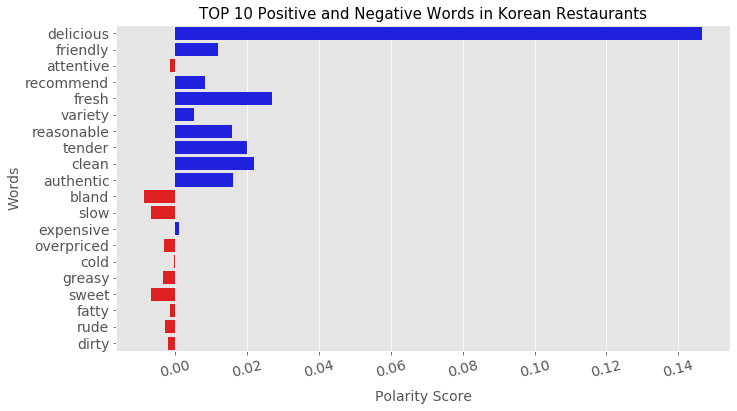

In [53]:
plt.figure(figsize=(11,6))
colors = ['red' if c < 0 else 'blue' for c in Korean_top_words.values]
sns.barplot(y=Korean_top_words.index, x=Korean_top_words.values, palette=colors)
plt.xlabel('Polarity Score', labelpad=10, fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.title('TOP 10 Positive and Negative Words in Korean Restaurants', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)

In [54]:
def get_polarity_score(dataset):
    dataset.text = dataset.text.apply(filter_words)
    
    terms_train=list(dataset['text'])
    class_train=list(dataset['labels'])
    
    ## get bag of words
    vectorizer = CountVectorizer()
    feature_train_counts=vectorizer.fit_transform(terms_train)
    
    ## run model
    svm = LinearSVC()
    svm.fit(feature_train_counts, class_train)
    
    ## create dataframe for score of each word in a review calculated by svm model
    coeff = svm.coef_[0]
    cuisine_words_score = pd.DataFrame({'score': coeff, 'word': vectorizer.get_feature_names()})
    
    ## get frequency of each word in all reviews in specific category
    cuisine_reviews = pd.DataFrame(feature_train_counts.toarray(), columns=vectorizer.get_feature_names())
    cuisine_reviews['labels'] = class_train
    cuisine_frequency = cuisine_reviews[cuisine_reviews['labels'] =='positive'].sum()[:-1]
    
    cuisine_words_score.set_index('word', inplace=True)
    cuisine_polarity_score = cuisine_words_score
    cuisine_polarity_score['frequency'] = cuisine_frequency
    
    cuisine_polarity_score.score = cuisine_polarity_score.score.astype(float)
    cuisine_polarity_score.frequency = cuisine_polarity_score.frequency.astype(int)
    
    ## calculate polarity score 
    cuisine_polarity_score['polarity'] = cuisine_polarity_score.score * cuisine_polarity_score.frequency / cuisine_reviews.shape[0]
    
    cuisine_polarity_score.polarity = cuisine_polarity_score.polarity.astype(float)
    ## drop unnecessary words
    unuseful_positive_words = ['great','amazing','love','best','awesome','excellent','good',
                                                   'favorite','loved','perfect','gem','perfectly','wonderful',
                                                    'happy','enjoyed','nice','well','super','like','better','decent','fine',
                                                    'pretty','enough','excited','impressed','ready','fantastic','glad','right',
                                                    'fabulous']
    unuseful_negative_words =  ['bad','disappointed','unfortunately','disappointing','horrible',
                                                    'lacking','terrible','sorry']
    unuseful_words = unuseful_positive_words + unuseful_negative_words
    cuisine_polarity_score.drop(cuisine_polarity_score.loc[unuseful_words].index, axis=0, inplace=True)
    
    return cuisine_polarity_score

In [55]:
def plot_top_words(top_words, category):
    plt.figure(figsize=(11,6))
    colors = ['red' if c < 0 else 'blue' for c in top_words.values]
    sns.barplot(y=top_words.index, x=top_words.values, palette=colors)
    plt.xlabel('Polarity Score', labelpad=10, fontsize=14)
    plt.ylabel('Words', fontsize=14)
    plt.title('TOP 10 Positive and Negative Words in %s Restaurants ' % category, fontsize=15)
    plt.tick_params(labelsize=14)
    plt.xticks(rotation=15)

In [56]:
def get_top_words(dataset, label, number=20):
    if label == 'positive':
        df = dataset[dataset.polarity>0].sort_values('polarity',ascending = False)[:number]
    else:
        df = dataset[dataset.polarity<0].sort_values('polarity')[:number]
    return df

#### Japanese

In [57]:
Japanese_reviews = get_dataset('Japanese')
Japanese_train = split_data(Japanese_reviews, 0.9)
print('Total %d number of reviews' % Japanese_train.shape[0])

Total 1767 number of reviews


In [58]:
Japanese_polarity_score = get_polarity_score(Japanese_train)

In [59]:
get_top_words(Japanese_polarity_score, 'positive')

score  frequency  polarity
word                                  
delicious  0.6263        302    0.1070
fresh      0.2158        300    0.0366
hot        0.5495        100    0.0311
friendly   0.2022        219    0.0251
fried      0.2379        144    0.0194
reasonable 0.7179         45    0.0183
recommend  0.1801        167    0.0170
fun        0.3611         71    0.0145
sweet      0.2656         89    0.0134
clean      0.3394         68    0.0131
helpful    0.6064         37    0.0127
attentive  0.3121         71    0.0125
disappoint 1.0098         19    0.0109
enjoy      0.2382         72    0.0097
fast       0.2426         67    0.0092
worth      0.1228        130    0.0090
complaint  0.7492         21    0.0089
variety    0.2853         49    0.0079
thank      0.3571         38    0.0077
die        0.6379         20    0.0072

In [60]:
get_top_words(Japanese_polarity_score,'negative',20)

score  frequency  polarity
word                                    
wrong       -0.8120         30   -0.0138
cold        -0.4731         42   -0.0112
cheap       -0.2695         43   -0.0066
bland       -1.4110          8   -0.0064
hard        -0.2323         45   -0.0059
pricey      -0.4538         21   -0.0054
easy        -0.3545         26   -0.0052
expensive   -0.2222         39   -0.0049
crazy       -0.3415         24   -0.0046
hate        -0.5943         12   -0.0040
desert      -0.2683         22   -0.0033
honest      -0.6989          8   -0.0032
authentic   -0.1291         41   -0.0030
outstanding -0.2162         24   -0.0029
problem     -0.3666         14   -0.0029
appreciate  -0.5033         10   -0.0028
prefer      -0.3346         15   -0.0028
slow        -0.1614         31   -0.0028
pros        -1.2477          4   -0.0028
worked      -0.5853          8   -0.0027

In [61]:
Japanese_top_positive_words = ['delicious','friendly','fresh','recommend','fun','reasonable',
                               'creative','clean','variety','attentive']
Japanese_top_negative_words = ['hard','cold','wrong','slow','bland','dark','expensive',
                               'rude','overpriced','crowded']
Japanese_top_words = Japanese_polarity_score.loc[Japanese_top_positive_words+Japanese_top_negative_words,'polarity']

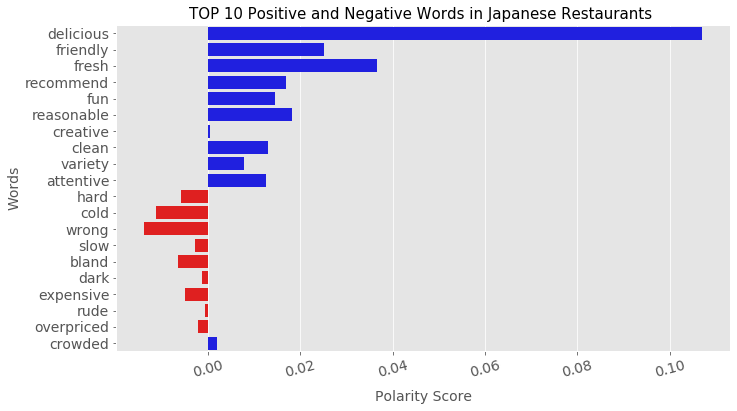

In [62]:
plot_top_words(Japanese_top_words,'Japanese')

#### Thai

In [63]:
Thai_reviews = get_dataset('Thai')
Thai_train = split_data(Thai_reviews, 0.8)
print('Total %d number of reviews' % Thai_train.shape[0])

Total 1916 number of reviews


In [64]:
Thai_polarity_score = get_polarity_score(Thai_train)

In [65]:
get_top_words(Thai_polarity_score,'positive')

score  frequency  polarity
word                                   
delicious   0.6532        409    0.1394
recommend   0.5620        182    0.0534
authentic   0.7110        107    0.0397
fresh       0.3276        188    0.0321
outstanding 1.0509         45    0.0247
friendly    0.1692        263    0.0232
hot         0.1948        225    0.0229
reasonable  0.5290         81    0.0224
helpful     0.8499         50    0.0222
attentive   0.4917         69    0.0177
phenomenal  1.3494         19    0.0134
worth       0.2612         94    0.0128
sticky      0.2767         88    0.0127
enjoy       0.2430         87    0.0110
miss        0.4892         30    0.0077
variety     0.4966         28    0.0073
easy        0.3850         36    0.0072
fair        0.5952         23    0.0071
crowded     0.9106         15    0.0071
incredible  0.4012         34    0.0071

In [66]:
get_top_words(Thai_polarity_score,'negative')

score  frequency  polarity
word                                  
sweet     -0.1743        151   -0.0137
work      -0.4047         55   -0.0116
bland     -1.3736         14   -0.0100
pleasant  -0.3948         33   -0.0068
top       -0.1957         64   -0.0065
satisfied -0.6151         20   -0.0064
problem   -0.6235         19   -0.0062
tough     -1.0658         10   -0.0056
rich      -0.5492         18   -0.0052
intimate  -0.6941         14   -0.0051
sour      -0.2206         44   -0.0051
pleased   -0.6012         16   -0.0050
cold      -0.3672         26   -0.0050
polite    -0.3753         25   -0.0049
hate      -0.6824         12   -0.0043
fried     -0.0209        355   -0.0039
poor      -0.9109          8   -0.0038
mediocre  -1.4147          5   -0.0037
expensive -0.3149         21   -0.0035
warm      -0.1408         45   -0.0033

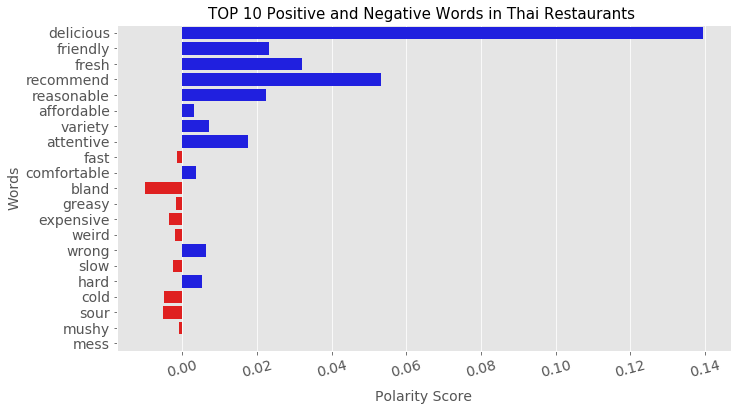

In [67]:
Thai_top_positive_words = ['delicious','friendly','fresh','recommend','reasonable','affordable','variety',
                           'attentive','fast','comfortable']
Thai_top_negative_words = ['bland','greasy','expensive','weird','wrong','slow','hard','cold','sour','mushy','mess']
Thai_top_words = Thai_polarity_score.loc[Thai_top_positive_words+Thai_top_negative_words,'polarity']
plot_top_words(Thai_top_words, 'Thai')

#### Chinese

In [68]:
Chinese_reviews = get_dataset('Chinese')
Chinese_train = split_data(Chinese_reviews, 0.85)
print('Total %d number of reviews' % Chinese_train.shape[0])

Total 2279 number of reviews


In [69]:
Chinese_polarity_score = get_polarity_score(Chinese_train)

In [70]:
get_top_words(Chinese_polarity_score,'positive')

score  frequency  polarity
word                                   
delicious   1.1037        348    0.1685
friendly    0.4860        215    0.0458
authentic   0.3923        117    0.0201
fresh       0.1479        265    0.0172
fast        0.2614        139    0.0159
liked       0.6469         55    0.0156
affordable  0.9902         34    0.0148
clean       0.2721        115    0.0137
reasonable  0.3345         75    0.0110
thank       0.7467         32    0.0105
sweet       0.1588        143    0.0100
outstanding 1.0279         19    0.0086
pleasantly  0.7731         25    0.0085
worth       0.1820        106    0.0085
helpful     0.4071         46    0.0082
solid       0.6301         28    0.0077
perfection  0.8727         20    0.0077
tender      0.2705         62    0.0074
fancy       0.8367         19    0.0070
recommend   0.0812        180    0.0064

In [71]:
get_top_words(Chinese_polarity_score,'negative')

score  frequency  polarity
word                                   
greasy     -0.5025         37   -0.0082
bland      -0.7085         21   -0.0065
dim        -0.0816        173   -0.0062
expensive  -0.3312         38   -0.0055
fun        -0.1549         72   -0.0049
cold       -0.2603         35   -0.0040
fair       -0.3660         22   -0.0035
frozen     -0.8820          9   -0.0035
efficient  -0.4156         19   -0.0035
easier     -1.1622          6   -0.0031
split      -0.9770          7   -0.0030
sour       -0.0497        137   -0.0030
trouble    -1.3059          5   -0.0029
waste      -1.2778          5   -0.0028
regret     -0.5779         11   -0.0028
bright     -0.7938          8   -0.0028
incredibly -0.3640         17   -0.0027
rude       -0.6851          9   -0.0027
dirty      -0.7665          8   -0.0027
helping    -1.0203          6   -0.0027

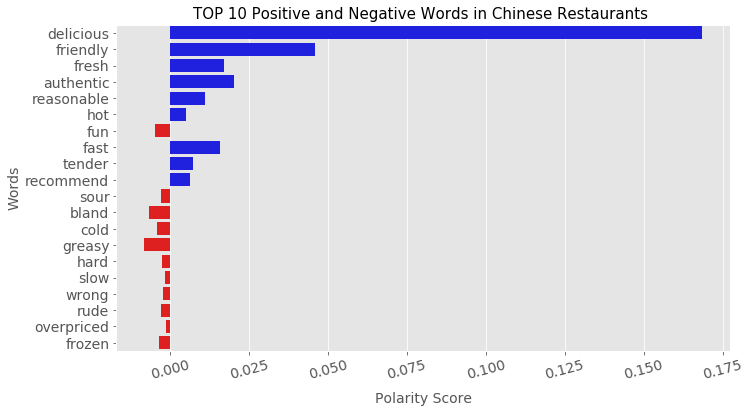

In [72]:
Chinese_top_positive_words = ['delicious','friendly','fresh','authentic','reasonable','hot','fun',
                           'fast','tender','recommend']
Chinese_top_negative_words = ['sour','bland','cold','greasy','hard','slow','wrong','rude','overpriced','frozen']
Chinese_top_words = Chinese_polarity_score.loc[Chinese_top_positive_words+Chinese_top_negative_words,'polarity']
plot_top_words(Chinese_top_words, 'Chinese')

#### Vietnamese

In [73]:
Vietnamese_reviews = get_dataset('Vietnamese')
Vietnamese_train = split_data(Vietnamese_reviews, 0.7)
print('Total %d number of reviews' % Vietnamese_train.shape[0])

Total 1825 number of reviews


In [74]:
Vietnamese_polarity_score = get_polarity_score(Vietnamese_train)

In [75]:
get_top_words(Vietnamese_polarity_score,'positive')

score  frequency  polarity
word                                  
delicious  0.3425        330    0.0619
friendly   0.3604        268    0.0529
fresh      0.2078        312    0.0355
clean      0.2855        189    0.0296
fast       0.6215         84    0.0286
attentive  0.7066         62    0.0240
cheap      0.8257         49    0.0222
sweet      0.3732         97    0.0198
tender     0.7539         45    0.0186
authentic  0.3113         97    0.0165
helpful    0.6341         46    0.0160
seasoned   1.0257         22    0.0124
liked      0.4272         48    0.0112
reasonable 0.2965         66    0.0107
smile      1.1471         15    0.0094
bomb       0.8922         17    0.0083
fried      0.0866        169    0.0080
fun        0.4651         30    0.0076
refreshing 0.6300         22    0.0076
complaint  0.8591         15    0.0071

In [76]:
get_top_words(Vietnamese_polarity_score,'negative')

score  frequency  polarity
word                                    
warm        -0.7387         23   -0.0093
slow        -0.4272         31   -0.0073
top         -0.1892         62   -0.0064
wrong       -0.3756         31   -0.0064
expensive   -0.7347         15   -0.0060
bland       -0.7869         14   -0.0060
thank       -0.4063         24   -0.0053
nicely      -0.6249         15   -0.0051
hard        -0.2156         43   -0.0051
sad         -0.9081          9   -0.0045
crisp       -0.8487          9   -0.0042
negative    -1.0838          7   -0.0042
cold        -0.1956         38   -0.0041
worked      -0.9728          7   -0.0037
greasy      -0.5111         13   -0.0036
strong      -0.3738         17   -0.0035
funny       -1.2331          5   -0.0034
weird       -0.4100         15   -0.0034
positive    -0.7423          8   -0.0033
exceptional -0.4823         12   -0.0032

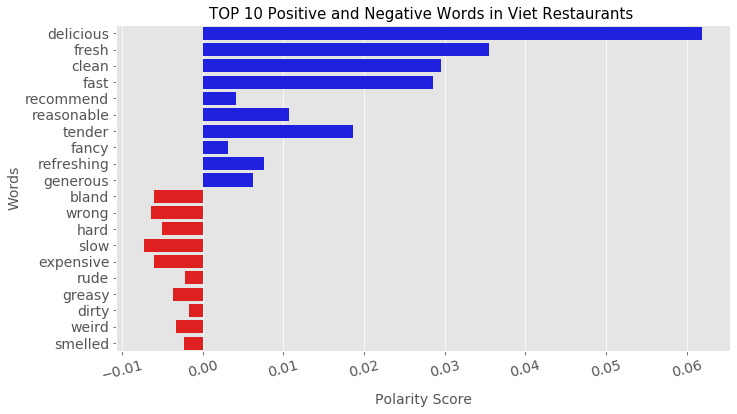

In [77]:
Viet_top_positive_words = ['delicious','fresh','clean','fast','recommend','reasonable','tender',
                           'fancy','refreshing','generous']
Viet_top_negative_words = ['bland','wrong','hard','slow','expensive','rude','greasy','dirty','weird','smelled']
Viet_top_words = Vietnamese_polarity_score.loc[Viet_top_positive_words+Viet_top_negative_words,'polarity']
plot_top_words(Viet_top_words,'Viet')

#### French

In [78]:
French_reviews = get_dataset('French')
French_train = split_data(French_reviews, 0.7)
print('Total %d number of reviews' % French_train.shape[0])

Total 1984 number of reviews


In [79]:
French_polarity_score = get_polarity_score(French_train)

In [80]:
get_top_words(French_polarity_score,'positive')

score  frequency  polarity
word                                   
delicious   0.6215        559    0.1751
fresh       0.4782        246    0.0593
sweet       0.3943        184    0.0366
tender      0.5727         98    0.0283
rich        0.6270         76    0.0240
perfection  0.6272         58    0.0183
outstanding 0.4790         70    0.0169
soft        0.4769         67    0.0161
die         0.5213         60    0.0158
warm        0.2372        125    0.0149
pricey      0.5385         55    0.0149
top         0.1612        180    0.0146
fun         0.5576         52    0.0146
superb      0.7396         37    0.0138
phenomenal  0.6992         35    0.0123
quaint      0.8139         30    0.0123
helpful     0.4288         56    0.0121
miss        0.8102         29    0.0118
beautiful   0.1582        129    0.0103
attentive   0.1551        128    0.0100

In [81]:
get_top_words(French_polarity_score, 'negative')

score  frequency  polarity
word                                    
lovely      -0.2704         84   -0.0114
fried       -0.3388         54   -0.0092
cold        -0.4715         38   -0.0090
work        -0.2298         56   -0.0065
desert      -0.3371         34   -0.0058
poor        -1.0334         11   -0.0057
slow        -0.3449         32   -0.0056
greasy      -1.2083          9   -0.0055
pleased     -0.5173         21   -0.0055
lost        -0.8517         12   -0.0052
recommended -0.2021         50   -0.0051
interesting -0.2958         34   -0.0051
prefer      -0.5585         18   -0.0051
memorable   -0.3554         28   -0.0050
hard        -0.1329         70   -0.0047
overwhelmed -1.2915          7   -0.0046
sad         -0.5523         16   -0.0045
easy        -0.2565         34   -0.0044
seasoned    -0.2277         36   -0.0041
break       -0.5938         13   -0.0039

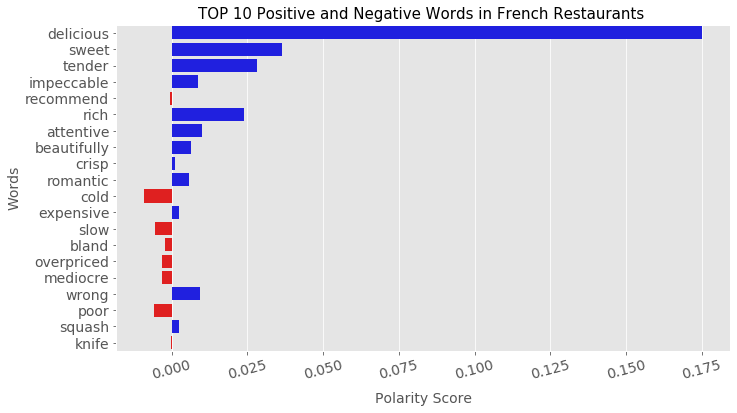

In [82]:
French_top_positive_words = ['delicious','sweet','tender','impeccable','recommend','rich','attentive',
                             'beautifully','crisp','romantic']
French_top_negative_words = ['cold','expensive','slow','bland','overpriced','mediocre','wrong',
                             'poor','squash','knife']
French_top_words = French_polarity_score.loc[French_top_positive_words+French_top_negative_words,'polarity']
plot_top_words(French_top_words,'French')

#### Italian

In [83]:
Italian_reviews = get_dataset('Italian')
Italian_train = split_data(Italian_reviews, 0.9)
print('Total %d number of reviews' % Italian_train.shape[0])

Total 3022 number of reviews


In [84]:
Italian_polarity_score = get_polarity_score(Italian_train)

In [85]:
get_top_words(Italian_polarity_score, 'positive',30)

score  frequency  polarity
word                                    
delicious    0.8232        528    0.1438
recommend    0.5789        245    0.0469
fresh        0.3154        372    0.0388
friendly     0.3422        338    0.0383
exceptional  1.5216         35    0.0176
fun          0.6051         76    0.0152
liked        0.6265         72    0.0149
enjoy        0.3531        126    0.0147
hot          0.3215        136    0.0145
lovely       0.9411         43    0.0134
thank        0.5173         67    0.0115
attentive    0.2436        126    0.0102
die          0.5451         55    0.0099
cool         0.4996         57    0.0094
perfection   0.5584         50    0.0092
reasonable   0.4077         68    0.0092
solid        0.6710         37    0.0082
easy         0.6771         36    0.0081
cheesy       0.7512         31    0.0077
cute         0.4400         49    0.0071
delightful   0.6852         31    0.0070
recommended  0.3762         56    0.0070
interesting  0.5258         40    0.0070
comfortable  0.9182         22    0.0067
pleased      0.8001         25    0.0066
fancy        0.6162         31    0.0063
impeccable   0.9495         17    0.0053
winner       1.3309         12    0.0053
refreshing   0.8718         18    0.0052
consistently 0.5581         27    0.0050

In [86]:
get_top_words(Italian_polarity_score, 'negative',30)

score  frequency  polarity
word                                       
cold           -0.7149         38   -0.0090
slow           -0.5922         38   -0.0074
wrong          -0.3935         57   -0.0074
seasoned       -0.7163         29   -0.0069
sweet          -0.1726        107   -0.0061
split          -0.2994         59   -0.0058
complain       -1.2300         12   -0.0049
bland          -1.3760         10   -0.0046
helpful        -0.2517         53   -0.0044
problem        -0.4677         28   -0.0043
smell          -1.1484         11   -0.0042
mediocre       -1.2262         10   -0.0041
sad            -1.1831         10   -0.0039
hard           -0.1617         73   -0.0039
pricey         -0.2109         54   -0.0038
expensive      -0.3952         28   -0.0037
recommendation -0.7761         14   -0.0036
memorable      -0.6660         15   -0.0033
rude           -0.6224         16   -0.0033
fair           -0.4635         21   -0.0032
warm           -0.1194         80   -0.0032
poor           -1.1872          8   -0.0031
rich           -0.2681         34   -0.0030
available      -0.3569         25   -0.0030
beautiful      -0.1619         55   -0.0029
greasy         -0.6333         14   -0.0029
dirty          -1.2107          7   -0.0028
awful          -1.3596          6   -0.0027
work           -0.0996         78   -0.0026
fairly         -0.3073         25   -0.0025

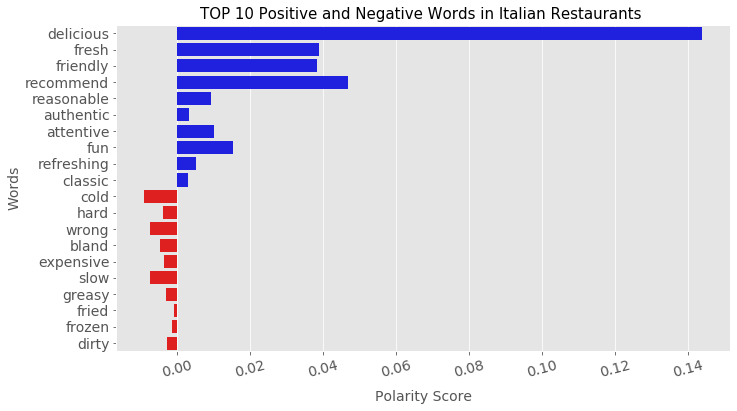

In [87]:
Italian_top_positive_words = ['delicious','fresh','friendly','recommend','reasonable','authentic',
                             'attentive','fun','refreshing','classic']
Italian_top_negative_words = ['cold','hard','wrong','bland','expensive','slow','greasy','fried','frozen','dirty']
Italian_top_words = Italian_polarity_score.loc[Italian_top_positive_words+Italian_top_negative_words,'polarity']
plot_top_words(Italian_top_words,'Italian')

### Combine all top words to compare among different cuisine typies

In [88]:
all_category = {'cuisine':['Korean','Japanese','Chinese','Thai','Vietnamese','French','Italian']}
cuisine_positive_words = pd.DataFrame(all_category)
for i,word in enumerate(Korean_top_positive_words):
    cuisine_positive_words.loc[0,i] = word

In [89]:
for i,word in enumerate(Korean_top_positive_words):
    cuisine_positive_words.iloc[0,i] = word
for i,word in enumerate(Japanese_top_positive_words):
    cuisine_positive_words.iloc[1,i] = word
for i,word in enumerate(Chinese_top_positive_words):
    cuisine_positive_words.iloc[2,i] = word
for i,word in enumerate(Thai_top_positive_words):
    cuisine_positive_words.iloc[3,i] = word
for i,word in enumerate(Viet_top_positive_words):
    cuisine_positive_words.iloc[4,i] = word
for i,word in enumerate(French_top_positive_words):
    cuisine_positive_words.iloc[5,i] = word
for i,word in enumerate(Italian_top_positive_words):
    cuisine_positive_words.iloc[6,i] = word

cuisine_positive_words.drop(9,axis=1,inplace=True)
cuisine_positive_words.columns=['0','1','2','3','4','5','6','7','8','9']
cuisine_positive_words['cuisine']=['Korean','Japanese','Chinese','Thai','Vietnamese','French','Italian']
cuisine_positive_words.set_index('cuisine', inplace=True)

In [90]:
all_category = {'cuisine':['Korean','Japanese','Chinese','Thai','Vietnamese','French','Italian']}
cuisine_negative_words = pd.DataFrame(all_category)
for i,word in enumerate(Korean_top_negative_words):
    cuisine_negative_words.loc[0,i] = word

In [91]:
for i,word in enumerate(Korean_top_negative_words):
    cuisine_negative_words.iloc[0,i] = word
for i,word in enumerate(Japanese_top_negative_words):
    cuisine_negative_words.iloc[1,i] = word
for i,word in enumerate(Chinese_top_negative_words):
    cuisine_negative_words.iloc[2,i] = word
for i,word in enumerate(Thai_top_negative_words):
    cuisine_negative_words.iloc[3,i] = word
for i,word in enumerate(Viet_top_negative_words):
    cuisine_negative_words.iloc[4,i] = word
for i,word in enumerate(French_top_negative_words):
    cuisine_negative_words.iloc[5,i] = word
for i,word in enumerate(Italian_top_negative_words):
    cuisine_negative_words.iloc[6,i] = word

cuisine_negative_words.drop(9,axis=1,inplace=True)
cuisine_negative_words.columns=['0','1','2','3','4','5','6','7','8','9']
cuisine_negative_words['cuisine']=['Korean','Japanese','Chinese','Thai','Vietnamese','French','Italian']
cuisine_negative_words.set_index('cuisine', inplace=True)

In [92]:
cuisine_positive_words

0         1          2           3           4  \
cuisine                                                              
Korean      delicious  friendly  attentive   recommend       fresh   
Japanese    delicious  friendly      fresh   recommend         fun   
Chinese     delicious  friendly      fresh   authentic  reasonable   
Thai        delicious  friendly      fresh   recommend  reasonable   
Vietnamese  delicious     fresh      clean        fast   recommend   
French      delicious     sweet     tender  impeccable   recommend   
Italian     delicious     fresh   friendly   recommend  reasonable   

                     5           6            7           8            9  
cuisine                                                                   
Korean         variety  reasonable       tender       clean    authentic  
Japanese    reasonable    creative        clean     variety    attentive  
Chinese            hot         fun         fast      tender    recommend  
Thai        affordable     variety    attentive        fast  comfortable  
Vietnamese  reasonable      tender        fancy  refreshing     generous  
French            rich   attentive  beautifully       crisp     romantic  
Italian      authentic   attentive          fun  refreshing      classic

In [93]:
cuisine_negative_words

0          1          2           3           4         5  \
cuisine                                                                     
Korean      bland       slow  expensive  overpriced        cold    greasy   
Japanese     hard       cold      wrong        slow       bland      dark   
Chinese      sour      bland       cold      greasy        hard      slow   
Thai        bland     greasy  expensive       weird       wrong      slow   
Vietnamese  bland      wrong       hard        slow   expensive      rude   
French       cold  expensive       slow       bland  overpriced  mediocre   
Italian      cold       hard      wrong       bland   expensive      slow   

                    6      7           8        9  
cuisine                                            
Korean          sweet  fatty        rude    dirty  
Japanese    expensive   rude  overpriced  crowded  
Chinese         wrong   rude  overpriced   frozen  
Thai             hard   cold        sour    mushy  
Vietnamese     greasy  dirty       weird  smelled  
French          wrong   poor      squash    knife  
Italian        greasy  fried      frozen    dirty

# 6. Findings

All in all, I discovered that for most restaurant types, delicious ranks first among every single positive word, demonstrating that preferences may weight more than different variables like service and cost when people are making a decision about a restaurant. For most cuisine types, the word friendly position first before the word reasonable, which means the well-disposed administration is bound to be the purpose behind the high score instead of reasonable price.It could also be observed that when it comes to the flavor of food, customers value freshness more than tastiness.

Various attributes are additionally appeared for changed restaurant categories. Vietnamese and Italian food got positive criticism in light of freshness, while French eateries got positive reviews for their sweet food. In any case, sweet food is the purpose behind Korean restaurants to have negative reviews. Korean, Japanese, Chinese, and Thai have positive reviews principally for their friendly service, particularly for Korean restaurants, since attentive ranks third. The variety of food is also the reason of high score for Korean, Japanese and Thai cuisine types. Fun and creative are unique charateristics for Japanese restaurants. For Italian cuisine type, customers prefer classic Italian food. The reason of high score in French cuisine type is identified with the romantic and beautiful appearence or environment.

From the negative word list, we could see that bland is one of the fundamental issues for Korean, Thai and Vietnamese restaurants, which means clients expect food of those three cuisine type ought to be spicy. For French, Italian and Japanese cuisine types of restaurants, it is probably going to have a low score on the grounds that the food is cold. The low score of Japanese cuisine type is likewise because of the dark and crowded environment. Sour is one of the principle issues for Chinese cuisine type. Slow service is the primary negative characteristic for Korean and French. French cuisine type gets negative reviews additionally at the expensive cost. Thai get negative audits reviews for greasy food.

Since my analysis may separate explicit highlights from any arrangement of reviews, restaurant owners can utilize it for basic data once they got a specific measure of Yelp reviews. From those reviews they can comprehend why clients love or dislike their restaurants, possibly incredible reviews fundamentally because of fresh food, or maybe unsatisfied reviews brought about by too high price. In the interim, hey can also compare the restaurant with similar restaurants within the same type.

# 7. Recommendation

## Korean

For food, prioritize taste as the most important selling point. Pay more attention to using fresh ingredients and keeping tender texture of meat. Control the cooking process to prevent greasy or too sweet, but do not lose flavor. It might be helpful to make some creations on dishes and make it look authentically attractive. For service, invest on waiters/waitress training. Make them highly professional in servicing customers, avoiding mistakes such as serving wrong food and paying more attention to caring customers all the time. Make sure they are friendly and nice to customers. For marketing strategy, invest on advertisement on social media and adjust price if overpriced. Make creation in menu and increase the variety to attract customers. And keep the environment clean. Make adjustment on price if it is overpriced.

## Japanese

For food, except prioritizing cooking food delicious, using fresh ingredients is extremely important for Japanese restaurants. Besides, they can make creations on traditional food in order to attract customers and increase varieties of dishes in menu. For service, train the waiters to provide friendly and attentive care for customers and avoid mistakes such as serving wrong food. For management, to those restaurants serving raw Japanese dish, we highly recommend that they can invest on technology to protect ingredients fresh or shorten the transportation time to avoid spoilage. Keep cleaning environment and fun. Make corresponding change according to customers feedback such as what are their feelings to the surroundings like the lighting, air condition temperature or the decoration. If there was too crowded, try to enlarge the dining area or redesign the table. Setting reasonable price and make adjustments on highly expensive price could also attract customers.

## Chinese

For Chinese restaurants, delicious and authentic food is more likely to receive high-rating reviews so tasty is always at the first place. People also like hot taste but not too sour or bland. And restaurants can make some improvements on cooking way especially for the greasy cuisine and it is great to use fresh ingredients. For service, restaurants can train waiters to perform nice, fast and professional service. In order to attract more customers, reasonable price is also important.

## Thai

Tasty food is the priority.  For Thai food, people like fresh taste but not too sour or too bland. They appreciate food with high variety. And they seem not like mushy or greasy. It is also necessary to see if some food taste weird for local customers. For service, besides some common requirements such as friendly and attentive service, customers also like fast and hate waiting because of ‘slow’ service. For management, customer like reasonable price and comfortable environment.

## Vietnamese

For Vietnam restaurants, beside some common requirements, people gave high reviews to some about their clean and fancy environment. But they also complain about dirty ones. So, there may diverse conditions in restaurants which dirty ones can learn from it and know where they need to improve. Reasonable price is popular factor to influence their reviews as well. Speaking of food, customer like tender taste and they like when restaurants serve generously. It may be a good way to attract customers. And they also like fresh and do not like greasy or bland. For service, it seems there are serious issues about wrong and slow service. Even ‘rude’ came much more frequently than other types. So, providing good service and having nice and professional waiters are significant.

## French

Speaking of food, customer like tender taste and they like when restaurants serve generously. It may be a good way to attract customers. And they also like fresh and do not like greasy or bland. For service, it seems there are serious issues about wrong and slow service. Even ‘rude’ came much more frequently than other types. So, providing good service and having nice and professional waiters are significant.


## Italian 

Speaking of food, customer like tender taste and they like when restaurants serve generously. It may be a good way to attract customers. And they also like fresh and do not like greasy or bland. For service, it seems there are serious issues about wrong and slow service. Even ‘rude’ came much more frequently than other types. So, providing good service and having nice and professional waiters are significant.
